<a href="https://colab.research.google.com/github/jumarques03/CP01-SERS-2SEMESTRE/blob/main/CP01_SERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aluna:** Júlia Souza Marques

**RM:** 565010

# ***Parte 1***

***1. Carregue o dataset e exiba as 10 primeiras linhas.***


In [72]:
import pandas as pd

In [73]:
df_inicial= pd.read_csv("/content/drive/MyDrive/household_power_consumption (1).txt", sep=";", low_memory=False)

df_inicial.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


***2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.***

In [74]:
print("--- 2. Diferença entre Global_active_power e Global_reactive_power ---\n")
print("Global_active_power (Potência Ativa): é a parte da energia que realmente usamos no dia a dia.\n")
print("Global_reactive_power (Potência Reativa): é a energia que não faz trabalho direto, mas serve para manter campos magnéticos em aparelhos como geladeiras, motores e ar-condicionado. \nEla não é consumida de fato, mas é essencial para o funcionamento desses equipamentos.")


--- 2. Diferença entre Global_active_power e Global_reactive_power ---

Global_active_power (Potência Ativa): é a parte da energia que realmente usamos no dia a dia.

Global_reactive_power (Potência Reativa): é a energia que não faz trabalho direto, mas serve para manter campos magnéticos em aparelhos como geladeiras, motores e ar-condicionado. 
Ela não é consumida de fato, mas é essencial para o funcionamento desses equipamentos.


***3. Verifique se existem valores ausentes no dataset. Quantifique-os***

In [75]:
# Convertendo as colunas tipo 'object' para 'float'
for coluna in df_inicial.columns:
  if coluna != 'Date' and coluna != 'Time':
    df_inicial[f'{coluna}'] = pd.to_numeric(df_inicial[f'{coluna}'], errors='coerce')   # 'errors='coerce' --> trata valores não convertíveis como NaN (Not a Number)

In [76]:
valores_ausentes = df_inicial.isnull().sum()
print("Valores Ausentes por Coluna:\n")
print(valores_ausentes)

df_inicial.dropna(inplace=True)
df_2 = df_inicial.copy()
print("\nValores ausentes removidos com sucesso! Eles representavam apenas 1.25% dos dados!")

Valores Ausentes por Coluna:

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Valores ausentes removidos com sucesso! Eles representavam apenas 1.25% dos dados!


***4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana
correspondente.***

In [77]:
df_inicial['Date'] = pd.to_datetime(df_inicial['Date'], dayfirst=True)

df_inicial.insert(2, 'Dia da Semana', df_inicial['Date'].dt.day_name().astype("string"))

df_inicial.head()

,Date,Time,Dia da Semana,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,Saturday,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,Saturday,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,Saturday,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,Saturday,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,Saturday,3.666,0.528,235.68,15.8,0.0,1.0,17.0


***5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de
Global_active_power.***

In [78]:
for coluna in df_inicial.columns:
  if coluna not in ['Date', 'Time', 'Dia da Semana']:
    df_inicial[f'{coluna}'] = pd.to_numeric(df_inicial[f'{coluna}'], errors='coerce')


valores_2007 = df_inicial[(df_inicial['Date'].dt.year) == 2007]   # Filtra os valores de 2007

consumo_diario_media = valores_2007.groupby(valores_2007['Date'].dt.date)['Global_active_power'].mean() # Calcula o consumo diário
media_total = consumo_diario_media.mean()
print(f'A média de consumo diário de Global_active_power no ano de 2007 foi: {media_total:.2f} kW')

A média de consumo diário de Global_active_power no ano de 2007 foi: 1.12 kW


***6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua
escolha.***  



/tmp/ipython-input-4279007538.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_inicial['Time'] = pd.to_datetime(df_inicial['Time'], )


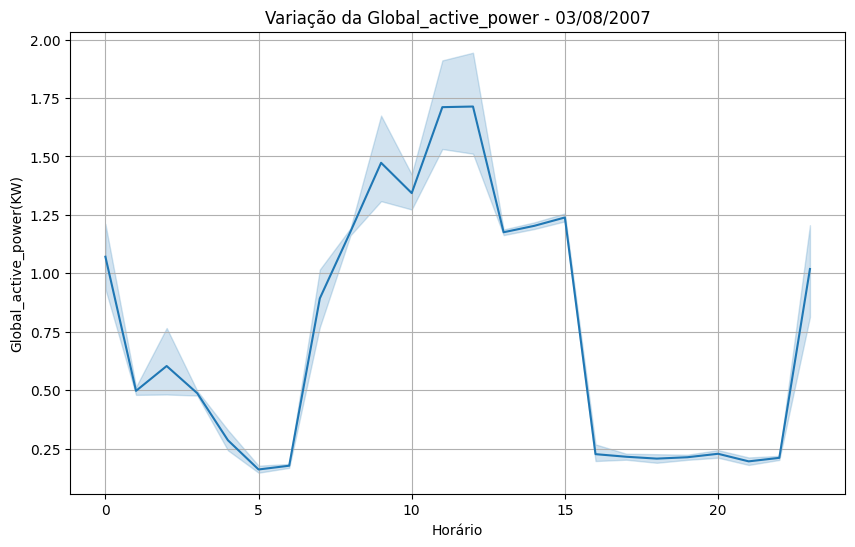

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

df_inicial['Time'] = pd.to_datetime(df_inicial['Time'], )

dia_escolhido = df_inicial[(df_inicial['Date']) == '2007-08-03']

plt.figure(figsize=(10, 6))
sns.lineplot(x=dia_escolhido['Time'].dt.hour, y='Global_active_power', data=dia_escolhido)
plt.title('Variação da Global_active_power - 03/08/2007')
plt.xlabel('Horário')
plt.ylabel('Global_active_power(KW)')
plt.grid(True)
plt.show()

***7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?***


Podemos observar que a distribuição da voltagem é aproximadamente normal, com concentração entre mais ou menos 240V a 245V.


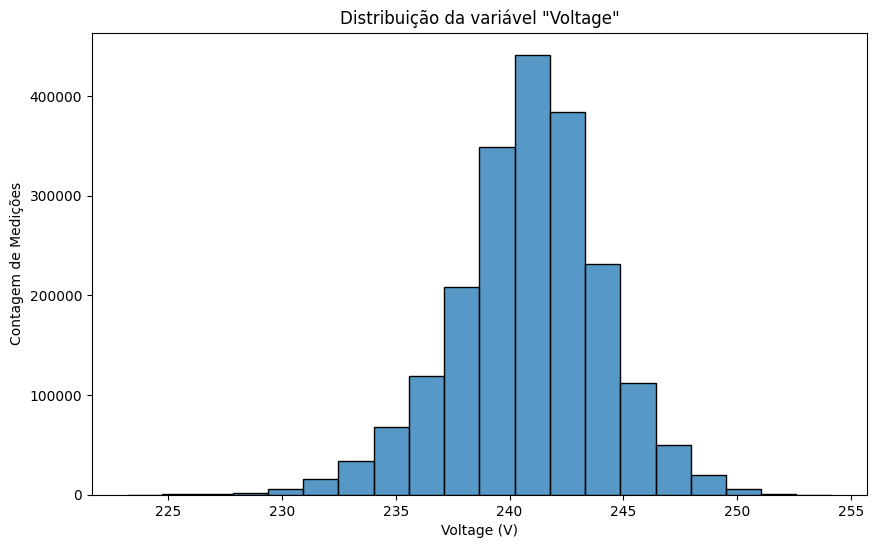

In [80]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_inicial, x='Voltage', bins=20)

plt.title('Distribuição da variável "Voltage"')
plt.xlabel('Voltage (V)')
plt.ylabel('Contagem de Medições')
print("Podemos observar que a distribuição da voltagem é aproximadamente normal, com concentração entre mais ou menos 240V a 245V.")
plt.show()

***8. Calcule o consumo médio por mês em todo o período disponível no dataset***


In [81]:
df_inicial = df_inicial.set_index('Date')
df_inicial['Consumo_Total_Wh'] = df_inicial['Sub_metering_1'] + df_inicial['Sub_metering_2'] + df_inicial['Sub_metering_3']

In [82]:
consumo_mensal_medio = df_inicial['Consumo_Total_Wh'].resample('ME').mean()
print("Consumo médio (Wh) por mês em todo o período disponível no dataset:\n\n")
print(consumo_mensal_medio.round(2))

Consumo médio (Wh) por mês em todo o período disponível no dataset:


Date
2006-12-31    10.87
2007-01-31    10.42
2007-02-28     9.49
2007-03-31    10.21
2007-04-30     6.84
2007-05-31     8.45
2007-06-30     7.38
2007-07-31     5.70
2007-08-31     6.98
2007-09-30     8.21
2007-10-31     8.67
2007-11-30     9.82
2007-12-31    11.64
2008-01-31     9.79
2008-02-29     8.45
2008-03-31     9.45
2008-04-30     9.57
2008-05-31     9.02
2008-06-30     9.78
2008-07-31     7.15
2008-08-31     2.37
2008-09-30     8.83
2008-10-31     8.59
2008-11-30     9.14
2008-12-31     8.79
2009-01-31    10.69
2009-02-28     9.79
2009-03-31     9.90
2009-04-30     9.61
2009-05-31     9.07
2009-06-30     8.05
2009-07-31     5.57
2009-08-31     6.04
2009-09-30     9.13
2009-10-31     9.77
2009-11-30    10.40
2009-12-31    11.09
2010-01-31    12.20
2010-02-28    12.76
2010-03-31     9.86
2010-04-30     9.51
2010-05-31    10.42
2010-06-30     9.73
2010-07-31     5.49
2010-08-31     5.34
2010-09-30     8.62
2010-

***9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).***

In [83]:
dias_agrupados_em_kwh =  df_inicial['Global_active_power'].resample('D').sum()
dia_com_maior_consumo = dias_agrupados_em_kwh.idxmax()  # Pega o id (nesse caso, date) do dia com maior consumo

print(f"O dia com maior consumo de energia ativa global (Global_active_power) foi: {dia_com_maior_consumo.date()}")

O dia com maior consumo de energia ativa global (Global_active_power) foi: 2006-12-23


***10. Compare o consumo médio de energia ativa global em dias de semana versus finais de
semana.***

In [84]:
df_inicial['Tipo_dia'] = df_inicial['Dia da Semana'].apply(lambda x: 'fim de semana' if x in ['Saturday', 'Sunday'] else 'dia de semana')

In [85]:
media_consumo = df_inicial.groupby('Tipo_dia')['Global_active_power'].mean()

print(f"A média de consumo da energia ativa global nos dias de semana é: {media_consumo.iloc[0]:.2f} kW")
print(f"A média de consumo da energia ativa global nos finais de semana é: {media_consumo.iloc[1]:.2f} kW")
print("Portanto, pode-se perceber que, em média, nos finais de semana há um consumo de energia ativa global maior do que nos dias de semana.")

A média de consumo da energia ativa global nos dias de semana é: 1.04 kW
A média de consumo da energia ativa global nos finais de semana é: 1.23 kW
Portanto, pode-se perceber que, em média, nos finais de semana há um consumo de energia ativa global maior do que nos dias de semana.


***11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage
e Global_intensity.***

In [86]:
colunas_correlacao = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
correlacao=df_inicial[colunas_correlacao].corr()

print("Correlação entre as variáveis: Global_active_power, Global_reactive_power, Voltage e Global_intensity:\n")
correlacao

Correlação entre as variáveis: Global_active_power, Global_reactive_power, Voltage e Global_intensity:



,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.247017,-0.399762,0.998889
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120
Voltage,-0.399762,-0.112246,1.000000,-0.411363
Global_intensity,0.998889,0.266120,-0.411363,1.000000


***12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1,
Sub_metering_2 e Sub_metering_3.***

In [87]:
df_inicial =  df_inicial.rename(columns={'Consumo_Total_Wh': 'Total_Sub_metering'}, inplace=False)

In [88]:
df_inicial.head(10)

,Time,Dia da Semana,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering,Tipo_dia
Date,,,,,,,,,,,
2006-12-16,2025-09-05 17:24:00,Saturday,4.216,0.418,234.84,18.4,0.0,1.0,17.0,18.0,fim de semana
2006-12-16,2025-09-05 17:25:00,Saturday,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17.0,fim de semana
2006-12-16,2025-09-05 17:26:00,Saturday,5.374,0.498,233.29,23.0,0.0,2.0,17.0,19.0,fim de semana
2006-12-16,2025-09-05 17:27:00,Saturday,5.388,0.502,233.74,23.0,0.0,1.0,17.0,18.0,fim de semana
2006-12-16,2025-09-05 17:28:00,Saturday,3.666,0.528,235.68,15.8,0.0,1.0,17.0,18.0,fim de semana
2006-12-16,2025-09-05 17:29:00,Saturday,3.520,0.522,235.02,15.0,0.0,2.0,17.0,19.0,fim de semana
2006-12-16,2025-09-05 17:30:00,Saturday,3.702,0.520,235.09,15.8,0.0,1.0,17.0,18.0,fim de semana
2006-12-16,2025-09-05 17:31:00,Saturday,3.700,0.520,235.22,15.8,0.0,1.0,17.0,18.0,fim de semana
2006-12-16,2025-09-05 17:32:00,Saturday,3.668,0.510,233.99,15.8,0.0,1.0,17.0,18.0,fim de semana


***13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de
Global_active_power.***



In [89]:
total_sub_metering_por_mes = (df_inicial['Total_Sub_metering'].resample('ME')).sum()
media_global_active_power_mes = (df_inicial['Global_active_power'].resample('ME').sum().mean())

meses_que_ultrapassam =total_sub_metering_por_mes[total_sub_metering_por_mes > media_global_active_power_mes]

print(meses_que_ultrapassam)
print("\nConclusão: Embora o resultado indique que todos os meses ultrapassam, este pode estar errado. O motivo é a inconsistência de unidades, pois não é correto comparar potência (kW) com energia (Wh), duas variáveis com unidade de medida distintas.")

Date
2006-12-31    239123.0
2007-01-31    465285.0
2007-02-28    382462.0
2007-03-31    455892.0
2007-04-30    269998.0
2007-05-31    377317.0
2007-06-30    318462.0
2007-07-31    253600.0
2007-08-31    311404.0
2007-09-30    354493.0
2007-10-31    387212.0
2007-11-30    424179.0
2007-12-31    519444.0
2008-01-31    436847.0
2008-02-29    352756.0
2008-03-31    422057.0
2008-04-30    413629.0
2008-05-31    402611.0
2008-06-30    422280.0
2008-07-31    318957.0
2008-08-31    105802.0
2008-09-30    381248.0
2008-10-31    383208.0
2008-11-30    394569.0
2008-12-31    391912.0
2009-01-31    477209.0
2009-02-28    393948.0
2009-03-31    441769.0
2009-04-30    414947.0
2009-05-31    404717.0
2009-06-30    321132.0
2009-07-31    248690.0
2009-08-31    264304.0
2009-09-30    394293.0
2009-10-31    435962.0
2009-11-30    449447.0
2009-12-31    495200.0
2010-01-31    506368.0
2010-02-28    514572.0
2010-03-31    420313.0
2010-04-30    410763.0
2010-05-31    465108.0
2010-06-30    420356.0
2010-0

***14. Faça um gráfico de série temporal do Voltage para o ano de 2008.***

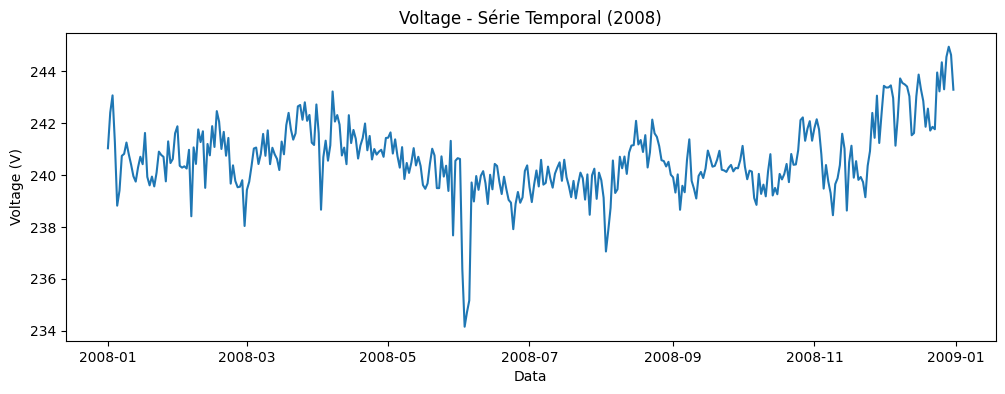

In [90]:
voltage_2008 = df_inicial['Voltage'].loc['2008'].resample('D').mean()

plt.figure(figsize=(12,4))
plt.plot(voltage_2008.index, voltage_2008.values)
plt.title('Voltage - Série Temporal (2008)')
plt.xlabel('Data')
plt.ylabel('Voltage (V)')
plt.show()

***15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).***

**Resumo das estações no Hemisfério Norte:**

**Verão:** Aproximadamente de 21 de junho a 23 de setembro.

**Outono:** Aproximadamente de 22 ou 23 de setembro a 21 de dezembro.

**Inverno:** Aproximadamente de 21 de dezembro a 20 de março.

**Primavera:** Aproximadamente de 20 de março a 21 de junho.

In [91]:
meses = (df_inicial['Total_Sub_metering'].resample('ME').sum())
meses_df = meses.to_frame()

def definir_estacao(data):
    mes = data.month
    if mes in [6, 7, 8, 9]:
        return 'Verão'
    elif mes in [12,1,2,3]:
        return 'Inverno'

meses_df['Estação'] = meses_df.index.map(definir_estacao)

dados_verao = meses_df.loc[meses_df['Estação'].isin(['Verão'])]
dados_inverno = meses_df.loc[meses_df['Estação'].isin(['Inverno'])]

media_verao = dados_verao['Total_Sub_metering'].mean()
mediana_verao = dados_verao['Total_Sub_metering'].median()
df_verao = dados_verao['Total_Sub_metering'].std()

media_inverno = dados_inverno['Total_Sub_metering'].mean()
mediana_inverno = dados_inverno['Total_Sub_metering'].median()
dp_inverno = dados_inverno['Total_Sub_metering'].std()

print("Métricas de Consumo de Energia (Wh):")

print("\n--- Verão ---")
print(f"Média: {media_verao:.2f}")
print(f"Mediana: {mediana_verao:.2f}")
print(f"Desvio Padrão: {df_verao:.2f}")

print("\n--- Inverno ---")
print(f"Média: {media_inverno:.2f}")
print(f"Mediana: {mediana_inverno:.2f}")
print(f"Desvio Padrão: {dp_inverno:.2f}")

print("\nConclusão: Os dados indicam um padrão de consumo de energia significativamente mais elevado durante o inverno em comparação com o verão.")


Métricas de Consumo de Energia (Wh):

--- Verão ---
Média: 305429.00
Mediana: 318709.50
Desvio Padrão: 84189.18

--- Inverno ---
Média: 432197.31
Mediana: 439308.00
Desvio Padrão: 71673.29

Conclusão: Os dados indicam um padrão de consumo de energia significativamente mais elevado durante o inverno em comparação com o verão.


***16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de
Global_active_power é semelhante à da base completa.***

In [92]:
amostra= df_inicial['Global_active_power'].sample(frac=0.01, random_state=10)

media = df_inicial['Global_active_power'].mean()
mediana = df_inicial['Global_active_power'].median()
dp = df_inicial['Global_active_power'].std()

print("Distribuição da amostra aleátorio de 1% dos dados de Global_active_power: \n")
print(f"Média: {str(amostra.mean()).ljust(10)} | Mediana: {str(amostra.median()).ljust(10)} | Desvio Padrão: {str(amostra.std()).ljust(10)}")

print("\n\nDistribuição total dos dados de Global_active_power: \n")
print(f"Média: {str(media).ljust(10)} | Mediana: {str(mediana).ljust(10)} | Desvio Padrão: {str(dp).ljust(10)}")

print("\n\nConclusão: Os valores obtidos indicam que há uma distribuição semelhante dos dados da coluna Global_active_power.")

Distribuição da amostra aleátorio de 1% dos dados de Global_active_power: 

Média: 1.0946932123164008 | Mediana: 0.592      | Desvio Padrão: 1.0666544863713847


Distribuição total dos dados de Global_active_power: 

Média: 1.0916150365006243 | Mediana: 0.602      | Desvio Padrão: 1.0572941610941602


Conclusão: Os valores obtidos indicam que há uma distribuição semelhante dos dados da coluna Global_active_power.


***17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas
principais.***

In [93]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_padronizado = df_inicial.copy()

df_padronizado[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']] = scaler.fit_transform(df_padronizado[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']])

print('Variáveis numéricas principais padronizadas!\n')
df_padronizado.head()

Variáveis numéricas principais padronizadas!



,Time,Dia da Semana,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering,Tipo_dia
Date,,,,,,,,,,,
2006-12-16,2025-09-05 17:24:00,Saturday,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,0.134328,fim de semana
2006-12-16,2025-09-05 17:25:00,Saturday,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,0.126866,fim de semana
2006-12-16,2025-09-05 17:26:00,Saturday,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,0.141791,fim de semana
2006-12-16,2025-09-05 17:27:00,Saturday,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,0.134328,fim de semana
2006-12-16,2025-09-05 17:28:00,Saturday,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,0.134328,fim de semana


***18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete
os resultados.***

In [94]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

amostra= df_padronizado['Total_Sub_metering'].sample(frac=0.02, random_state=10)
amostra =amostra.to_frame()
modelo_KMeans = KMeans(n_clusters=3)  # irá encontrar 3 clusters
modelo_KMeans.fit(amostra) # O algoritmo calcula os centros de cada grupo (chamados de "centroides") e decide qual ponto de dado pertence a qual cluster.

KMeans(n_clusters=3)

In [95]:
amostra['clusters'] = modelo_KMeans.predict(amostra)  # faz tipo: a qual clusters esse ponto pertence? (para todos os pontos)

In [96]:
amostra.tail(40) # Mostra qual dia foi classificado em qual grupo de consumo.

,Total_Sub_metering,clusters
Date,,
2010-11-23,0.000000,1
2008-05-03,0.014925,1
2008-09-25,0.014925,1
2007-12-29,0.283582,2
2007-12-16,0.000000,1
2007-03-04,0.000000,1
2008-12-03,0.141791,0
2009-02-28,0.000000,1
2008-10-05,0.007463,1


In [97]:
silhouette = silhouette_score(amostra, amostra['clusters']) # Avalia a adequação dos resultados de agrupamento, fornecendo uma medida quantitativa de quão bem definidos e distintos são os agrupamentos.

print("--- Análise dos Clusters de Consumo ---")
print("A análise dos dados de cada cluster revelou a seguinte correspondência:")
print(" -> Cluster 0 = Baixo Consumo ")
print(" -> Cluster 1 = Alto Consumo ")
print(" -> Cluster 2 = Médio Consumo ")
print(f"\nValidação: O Silhouette Score {silhouette:.4f} confirma que esta separação é estatisticamente forte.")

--- Análise dos Clusters de Consumo ---
A análise dos dados de cada cluster revelou a seguinte correspondência:
 -> Cluster 0 = Baixo Consumo 
 -> Cluster 1 = Alto Consumo 
 -> Cluster 2 = Médio Consumo 

Validação: O Silhouette Score 0.9848 confirma que esta separação é estatisticamente forte.


***19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para
Global_active_power em um período de 6 meses.***

In [98]:
from statsmodels.tsa.seasonal import seasonal_decompose
amostra2 = df_padronizado['Global_active_power']['2007-01':'2007-06']
amostra2 = amostra2.resample('D').sum()
decomposicao = seasonal_decompose(amostra2, period=7) # para dados diário, period=7

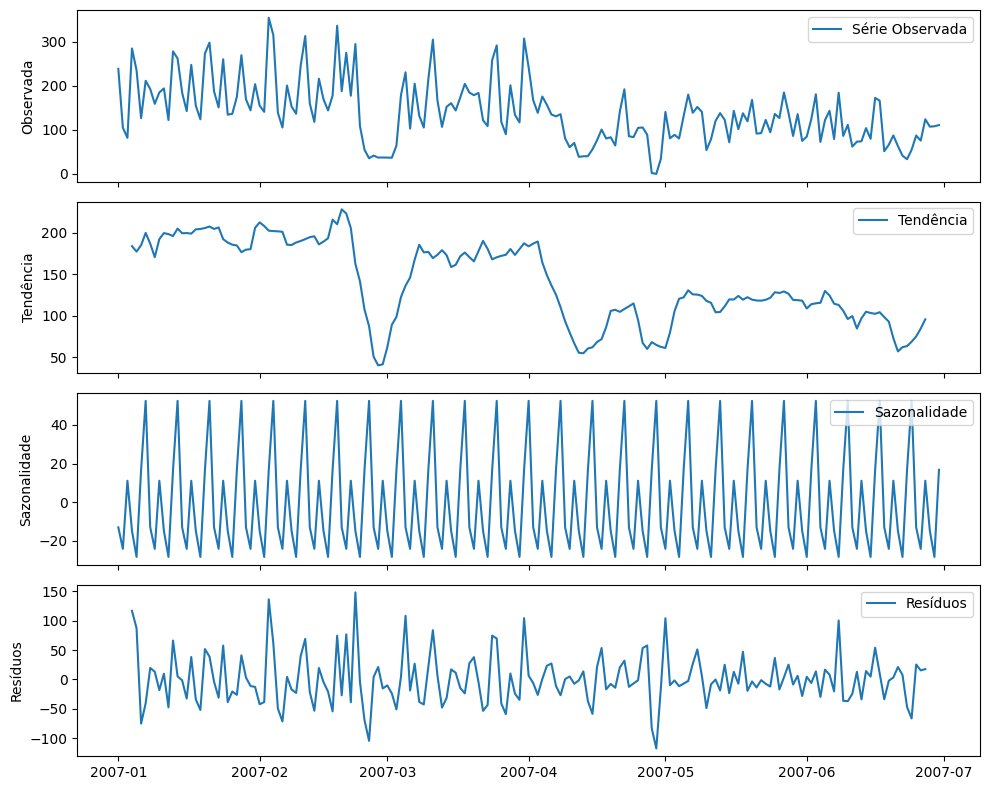

In [99]:
# Exemplo de plotagem
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

ax1.plot(decomposicao.observed, label='Série Observada')
ax1.set_ylabel('Observada')
ax1.legend()

ax2.plot(decomposicao.trend, label='Tendência')
ax2.set_ylabel('Tendência')
ax2.legend()

ax3.plot(decomposicao.seasonal, label='Sazonalidade')
ax3.set_ylabel('Sazonalidade')
ax3.legend()

ax4.plot(decomposicao.resid, label='Resíduos')
ax4.set_ylabel('Resíduos')
ax4.legend()

plt.tight_layout()
plt.show()

***20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de
Global_intensity. Avalie o erro do modelo.***

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

amostra3= df_padronizado[['Global_intensity', 'Global_active_power']].sample(frac=0.02, random_state=10)

X = amostra3[['Global_intensity']]
y=amostra3['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Métricas do Modelo de Regressão Linear Simples:")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

print("\nO modelo de regressão linear apresenta erros muito baixos (MSE e MAE próximos de zero) e R² alto, indicando que as previsões estão muito próximas dos valores reais, considerando que os dados estão padronizados.")

Métricas do Modelo de Regressão Linear Simples:
R²: 0.9977
MSE: 0.0000
MAE: 0.0031

O modelo de regressão linear apresenta erros muito baixos (MSE e MAE próximos de zero) e R² alto, indicando que as previsões estão muito próximas dos valores reais, considerando que os dados estão padronizados.


# ***Parte 2***

**21. Séries temporais por hora**
- Converta Date e Time em índice datetime.
- Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power.
- Identifique os horários de maior consumo médio ao longo do dia.

In [101]:
df_2['datetime'] = df_2['Date'] + ' ' + df_2['Time']
df_2['datetime'] = pd.to_datetime(df_2['datetime'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

In [102]:
df_2 = df_2.set_index('datetime')

In [103]:
df_2.drop(columns=['Date', 'Time'], inplace=True)

In [104]:
df_por_hora = df_por_hora = df_2.resample('h').mean()

In [105]:
media_global_active_power = df_por_hora['Global_active_power'].mean()
print(f'A média de Global_active_power é: {media_global_active_power:.2f} kW')

A média de Global_active_power é: 1.09 kW


In [106]:
df_por_hora['Total_Sub_Metering'] = df_por_hora['Sub_metering_1'] + df_por_hora['Sub_metering_2'] + df_por_hora['Sub_metering_3']

In [107]:
maior_consumo_medio = (df_por_hora['Total_Sub_Metering'].groupby(df_por_hora.index.hour).mean())

maiores_consumo = maior_consumo_medio.nlargest(10)

print("Os horários de maior consumo médio ao longo do dia são:")
maiores_consumo

Os horários de maior consumo médio ao longo do dia são:


,Total_Sub_Metering
datetime,
9,15.096152
8,15.038783
10,14.128335
11,13.734432
20,13.116565
12,12.718856
21,12.201358
13,12.045128
7,11.556074


**22. Autocorrelação do consumo**
- Use a série temporal de Global_active_power.
- Calcule a autocorrelação em lags de 1h, 24h e 48h.
- Pergunta: existem padrões repetidos diariamente?

In [108]:
autocorr_1 = df_por_hora['Global_active_power'].autocorr(lag=1)
print(f"Autocorrelação de Global_active_power de 1h: {autocorr_1:.2f}")

autocorr_2 = df_por_hora['Global_active_power'].autocorr(lag=24)
print(f"Autocorrelação de Global_active_power de 24h: {autocorr_2:.2f}")

autocorr_3 = df_por_hora['Global_active_power'].autocorr(lag=48)
print(f"Autocorrelação de Global_active_power de 48h: {autocorr_3:.2f}")

print("\nResposta:")
print("Sim, a análise confirma a existência de padrões que se repetem diariamente. \nA autocorrelação de Global_active_power de 0,71 para 1h, 0,44 para 24h e 0,40 para 48h, confirma esses padrões.\nOs valores de 24h e 48h não são maiores porque dias de semana e fins de semana foram analisados juntos.")

Autocorrelação de Global_active_power de 1h: 0.71
Autocorrelação de Global_active_power de 24h: 0.44
Autocorrelação de Global_active_power de 48h: 0.40

Resposta:
Sim, a análise confirma a existência de padrões que se repetem diariamente. 
A autocorrelação de Global_active_power de 0,71 para 1h, 0,44 para 24h e 0,40 para 48h, confirma esses padrões.
Os valores de 24h e 48h não são maiores porque dias de semana e fins de semana foram analisados juntos.


**23. Redução de dimensionalidade com PCA**
- Selecione Global_active_power, Global_reactive_power, Voltage e Global_intensity.
- Aplique PCA para reduzir para 2 componentes principais.
- Analise a variância explicada por cada componente.


In [109]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # Importante sempre padronizar os dados
amostra4= df_2[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].sample(frac=0.02, random_state=10)

scaler = StandardScaler()
amostra4[amostra4.columns] = scaler.fit_transform(amostra4)

p = 2
pca = PCA(n_components=p)

treino_pca = pca.fit_transform(amostra4)

v = pca.explained_variance_ratio_

print(f"Conclusão: Os 2 componentes principais retêm {(v.sum() *100).round(2)}% da variância dos dados, demonstrando uma redução de dimensionalidade bem-sucedida e sem perda significativa de informação.\nO primeiro componente sozinho respondendo por {(v[0]*100).round(2)}% e o segundo respondendo por {(v[1]*100).round(2)}%.")

Conclusão: Os 2 componentes principais retêm 82.11% da variância dos dados, demonstrando uma redução de dimensionalidade bem-sucedida e sem perda significativa de informação.
O primeiro componente sozinho respondendo por 59.45% e o segundo respondendo por 22.66%.


**24. Visualização de clusters no espaço PCA**
- Combine os resultados do PCA com K-Means (3 clusters).
- Plote os pontos resultantes e pinte cada grupo por cluster.
- Pergunta: os grupos se separam de forma clara?


In [110]:
treino_pca = pd.DataFrame(treino_pca)
modelo_KMeans = KMeans(n_clusters=3)
modelo_KMeans.fit(treino_pca)

treino_pca['clusters'] = modelo_KMeans.predict(treino_pca)

silhouette = silhouette_score(treino_pca, treino_pca['clusters'])
print(f"Silhouette score: {silhouette:.4f}")

Silhouette score: 0.4747


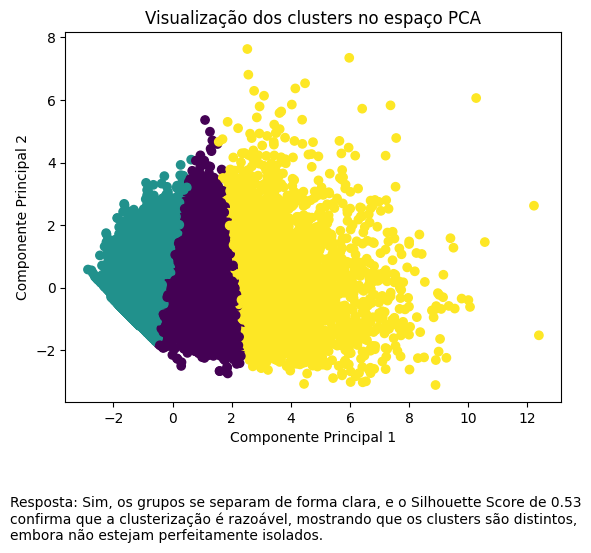

In [111]:
plt.scatter(treino_pca[0], treino_pca[1], c= treino_pca['clusters'], cmap='viridis')
plt.title('Visualização dos clusters no espaço PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
texto_resposta = "Resposta: Sim, os grupos se separam de forma clara, e o Silhouette Score de 0.53 confirma que a clusterização é razoável, mostrando que os clusters são distintos, embora não estejam perfeitamente isolados."
plt.text(-5.5, -8, texto_resposta, wrap=True)
# Exibir o gráfico
plt.show()

**25. Regressão polinomial vs linear**
- Modele Global_active_power em função de Voltage.
- Compare Regressão Linear Simples com Regressão Polinomial (grau 2).
- Analise RMSE e a curva ajustada.

In [112]:
from sklearn.metrics import root_mean_squared_error
amostra5= df_padronizado[['Voltage', 'Global_active_power']].sample(frac=0.02, random_state=10)

X = amostra5[['Voltage']]
y=amostra5['Global_active_power']

# O modelo aprende a relação entre X_train e y_train.
#Depois, testamos se ele consegue prever y_test usando apenas X_test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo_linear = LinearRegression()
modelo_linear.fit(X_train, y_train)

y_pred = modelo_linear.predict(X_test)

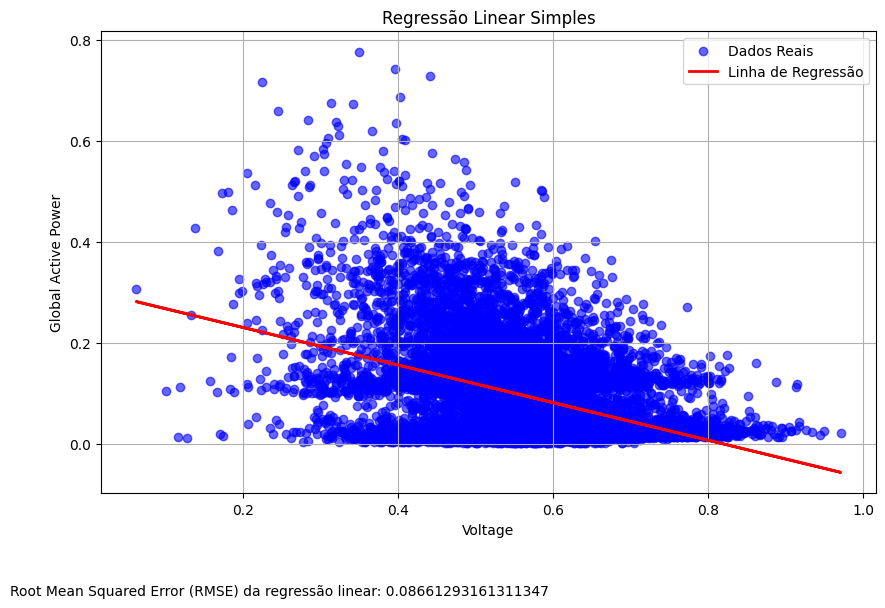

In [113]:
plt.figure(figsize=(10, 6))

#Plota os pontos de dados reais
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Dados Reais')

#Plota a linha de regressão
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha de Regressão')

plt.title('Regressão Linear Simples')
plt.xlabel('Voltage')
plt.ylabel('Global Active Power')
plt.legend()
plt.grid(True)

rmse_linear = root_mean_squared_error(y_test, y_pred)
texto_resposta = f"Root Mean Squared Error (RMSE) da regressão linear: {rmse_linear}"  # Mede o erro médio entre valores observados e previstos.
plt.text(-0.1, -0.3, texto_resposta, wrap=True, fontsize=10)

plt.show()

In [114]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)  # segundo grau

X_train_poly = poly_features.fit_transform(X_train) # Ajusta e transforma o conjunto de treino em x²

X_test_poly = poly_features.transform(X_test) # Apenas transforma o conjunto de teste

modelo_poli = LinearRegression()
modelo_poli.fit(X_train_poly, y_train)

y_pred_poly = modelo_poli.predict(X_test_poly)

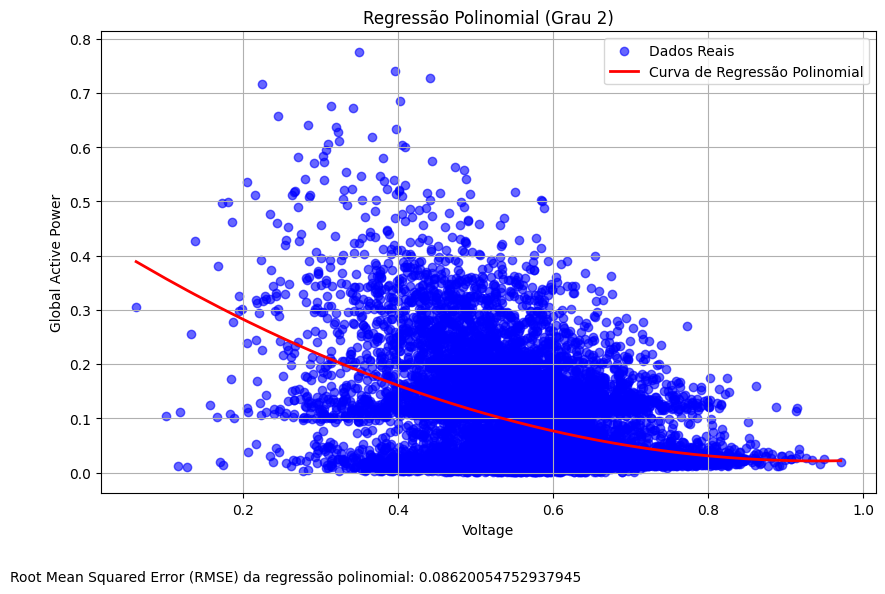

In [115]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Dados Reais')

# 2. Plota a curva de regressão polinomial
# Para desenhar a curva corretamente, se ordena os valores de X  ---> importante!
sorted_zip = sorted(zip(X_test.values, y_pred_poly))
X_test_sorted, y_pred_poly_sorted = zip(*sorted_zip)
plt.plot(X_test_sorted, y_pred_poly_sorted, color='red', linewidth=2, label='Curva de Regressão Polinomial')

plt.title('Regressão Polinomial (Grau 2)')
plt.xlabel('Voltage')
plt.ylabel('Global Active Power')
plt.legend()
plt.grid(True)

rmse_poly = root_mean_squared_error(y_test, y_pred_poly)
texto_resposta = f"Root Mean Squared Error (RMSE) da regressão polinomial: {rmse_poly}"  # Mede o erro médio entre valores observados e previstos.
plt.text(-0.1, -0.2, texto_resposta, wrap=True, fontsize=10)

plt.show()

In [116]:
print("Conclusão: Comparando os modelos, a Regressão Polinomial (Grau 2) é a melhor escolha. \nEla apresentou um RMSE ligeiramente menor (0.0862 vs 0.0866) e também o ajuste da curva se mostrou visualmente melhor ao compararmos com a linha reta do modelo linear.")

Conclusão: Comparando os modelos, a Regressão Polinomial (Grau 2) é a melhor escolha. 
Ela apresentou um RMSE ligeiramente menor (0.0862 vs 0.0866) e também o ajuste da curva se mostrou visualmente melhor ao compararmos com a linha reta do modelo linear.


# ***Parte 3***

**26. Carregamento e inspeção inicial**
- Carregue o dataset no Pandas.
- Liste tipos de dados e estatísticas descritivas (.info() e .describe())

In [117]:
df = pd.read_csv("/content/drive/MyDrive/energydata_complete.csv", sep=",", low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [118]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


**27. Distribuição do consumo**
- Crie histogramas e séries temporais para a variável Appliances.
- Pergunta: o consumo tende a se concentrar em valores baixos ou altos?

In [119]:
#Appliances --> energy use in Wh
df['date'] = pd.to_datetime(df['date'], format='mixed')
df = df.set_index('date')

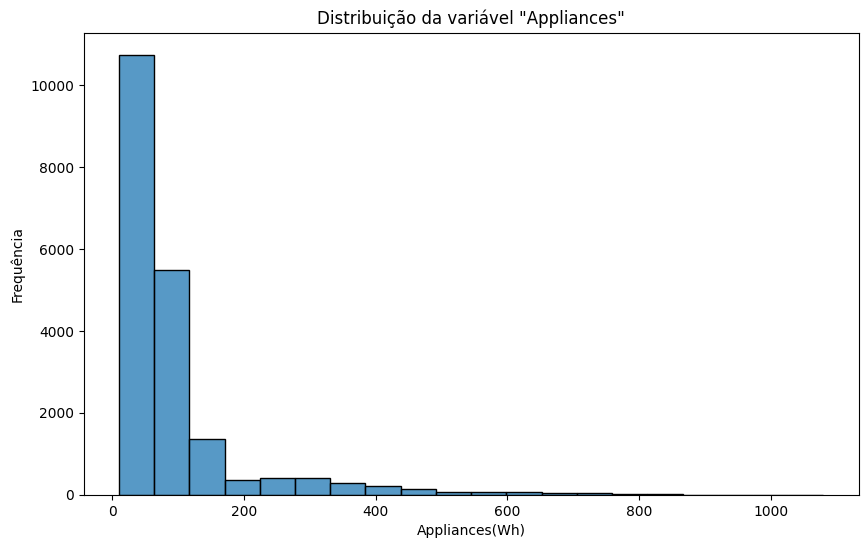

In [120]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Appliances', bins=20)

plt.title('Distribuição da variável "Appliances"')
plt.xlabel('Appliances(Wh)')
plt.ylabel('Frequência')
plt.show()

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultado = seasonal_decompose(df['Appliances'], period=144) # 6 medições por hora *24h

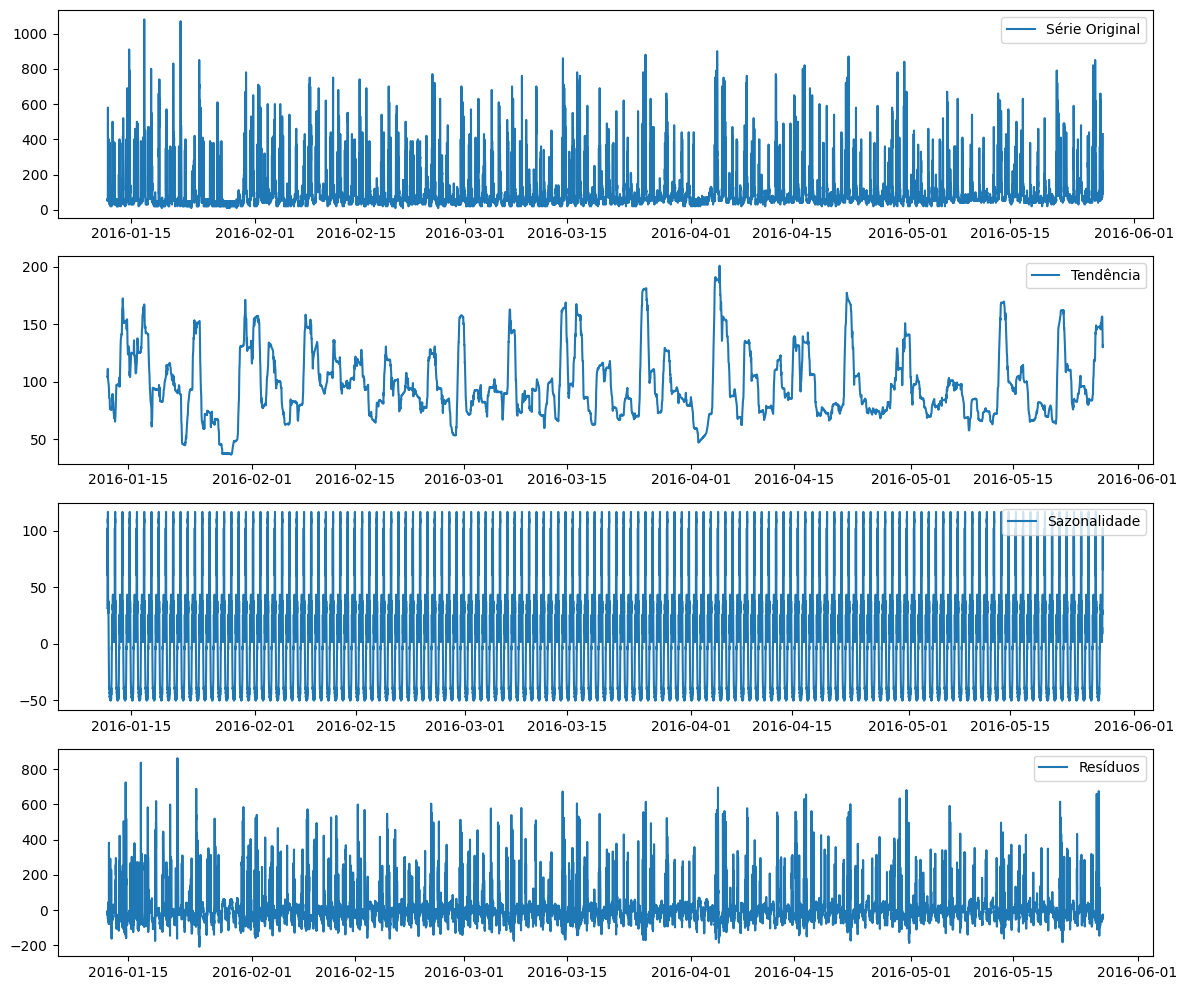

In [122]:
# Extrair os componentes
tendencia = resultado.trend
sazonalidade = resultado.seasonal
residuos = resultado.resid

# Plotar os componentes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

ax1.plot(df['Appliances'], label='Série Original')
ax1.legend()

ax2.plot(tendencia, label='Tendência')
ax2.legend()

ax3.plot(sazonalidade, label='Sazonalidade')
ax3.legend()

ax4.plot(residuos, label='Resíduos')
ax4.legend()

plt.tight_layout()
plt.show()

In [123]:
print("Conclusão: O consumo tende a se concentrar em valores baixos, com uma média geral de 97.69 Wh, embora picos de consumo sejam frequentemente observados na faixa de 100 a 175 Wh.")

Conclusão: O consumo tende a se concentrar em valores baixos, com uma média geral de 97.69 Wh, embora picos de consumo sejam frequentemente observados na faixa de 100 a 175 Wh.


**28. Correlações com variáveis ambientais**
- Calcule correlações entre Appliances e variáveis como temperatura e umidade.
- Pergunta: quais fatores têm mais relação com o consumo?

In [124]:
c = df.corr()

print("O consumo de energia (Appliances) tem maior correlação com lights (0.197) e as temperaturas internas, como T2 (0.120) e T6 (0.118). Appliances também tem correlação com RH_out, porém esta é negativa.")
c

O consumo de energia (Appliances) tem maior correlação com lights (0.197) e as temperaturas internas, como T2 (0.120) e T6 (0.118). Appliances também tem correlação com RH_out, porém esta é negativa.


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


**29. Normalização dos dados**
- Aplique Min-Max Scaling às variáveis numéricas.
- Reutilize esses dados em modelos posteriores.

In [125]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2= scaler.fit_transform(df)
df2 = pd.DataFrame(df2, columns=df.columns, index=df.index)

**30. PCA**
- Aplique PCA e reduza para 2 componentes principais.
- Plote os dados resultantes.
- Pergunta: aparecem padrões ou agrupamentos naturais?

In [126]:
from sklearn.decomposition import PCA

p = 2
pca = PCA(n_components=p)

treino_pca = pca.fit_transform(df2)

pca.explained_variance_ratio_

array([0.36089668, 0.20905617])

In [127]:
treino_pca = pd.DataFrame(treino_pca)

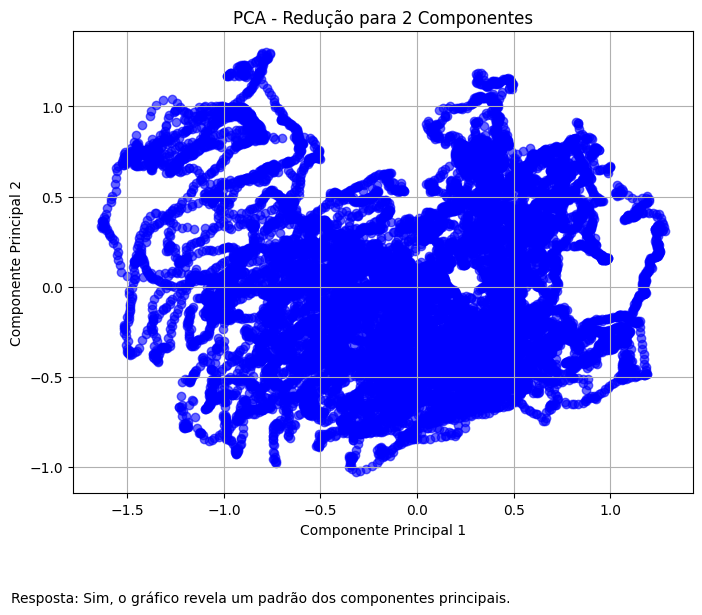

In [128]:
import matplotlib.pyplot as plt

# treino_pca já é o resultado do PCA (2 colunas = PC1 e PC2)
plt.figure(figsize=(8,6))
plt.scatter(treino_pca[0], treino_pca[1], alpha=0.6, c="blue")

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA - Redução para 2 Componentes")
plt.grid(True)
texto_resposta = "Resposta: Sim, o gráfico revela um padrão dos componentes principais."  # Mede o erro médio entre valores observados e previstos.
plt.text(-2.1, -1.75, texto_resposta, wrap=True, fontsize=10)
plt.show()


**31. Regressão Linear Múltipla**
- Modele Appliances em função das variáveis ambientais.
- Avalie R² e erro médio.

In [129]:
variaveis_ambientais = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9','RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']
X = df2[variaveis_ambientais]
y=df2['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse_linear = root_mean_squared_error(y_test, y_pred)
print("Métricas do Modelo de Regressão Linear Múltipla:")
print(f"R²: {r2:.4f}")  # Quanto mais perto de 1, melhor o modelo explica a variabilidade dos dados
print(f"MAE: {mae:.4f}")  #Quanto menor o valor do MAE, mais próximas as previsões estão dos valores reais.

print(f"\nAvaliação: O R² de {r2:.4f} indica que as variáveis ambientais não explicam a maior parte das variações no consumo. \nNo entanto, o erro médio baixo (MAE de {mae:.4f}) mostra que o modelo ainda consegue prever o consumo com boa precisão nos casos mais comuns, ou seja, em casos sem muita variação de consumo.")

Métricas do Modelo de Regressão Linear Múltipla:
R²: 0.1492
MAE: 0.0501

Avaliação: O R² de 0.1492 indica que as variáveis ambientais não explicam a maior parte das variações no consumo. 
No entanto, o erro médio baixo (MAE de 0.0501) mostra que o modelo ainda consegue prever o consumo com boa precisão nos casos mais comuns, ou seja, em casos sem muita variação de consumo.


**32. Random Forest Regressor**
- Treine um modelo de Random Forest para prever Appliances.
- Compare o RMSE com a regressão linear.

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [131]:
# X são as variáveis de entrada (features)
X = df2.drop("Appliances", axis=1)

# y é a variável que queremos prever
y = df2["Appliances"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
rmse= root_mean_squared_error(y_test, y_pred)
print("RMSE ( Random Forest): ", rmse)
print("RMSE (Regressão Linear): ", rmse_linear)

print("\nComparação dos RMSEs:")
print("O Random Forest apresentou um RMSE menor que a Regressão Linear, o que significa que ele prevê Appliances com mais precisão.")


RMSE ( Random Forest):  0.06606494183409209
RMSE (Regressão Linear):  0.08749885665797492

Comparação dos RMSEs:
O Random Forest apresentou um RMSE menor que a Regressão Linear, o que significa que ele prevê Appliances com mais precisão.


**33. K-Means clustering**
- Aplique K-Means com 3 a 5 clusters.
- Interprete os perfis de consumo.

In [132]:
distorcoes = []

K = range(1,10) # Adotando 10 clusters.
for k in K:
    modelo01 = KMeans(n_clusters=k)
    modelo01.fit(df2)    # Treinamos o modelo com o algoritmo K-Means por 10 vezes
    distorcoes.append(modelo01.inertia_)

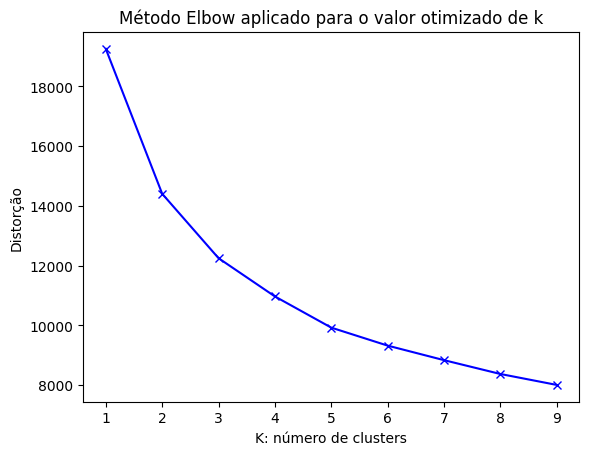

In [133]:
plt.plot(K, distorcoes, '-bx')

# Define os labels do eixos do gráfico:
plt.xlabel('K: número de clusters')
plt.ylabel('Distorção')

# Define um título para o gráfico:
plt.title('Método Elbow aplicado para o valor otimizado de k')

# Mostra o gráfico:
plt.show()

In [134]:
modelo_KMeans = KMeans(n_clusters=5)
modelo_KMeans.fit(treino_pca)

treino_pca['clusters'] = modelo_KMeans.predict(treino_pca)

silhouette = silhouette_score(treino_pca, treino_pca['clusters'])
print(f"Silhouette score: {silhouette:.4f}")

Silhouette score: 0.6848


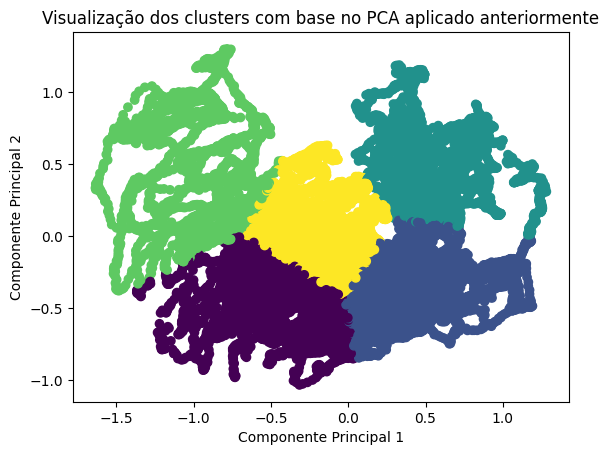

In [135]:
plt.scatter(treino_pca[0],treino_pca[1], c= treino_pca['clusters'], cmap='viridis')
plt.title('Visualização dos clusters com base no PCA aplicado anteriormente')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
# Exibir o gráfico
plt.show()

In [136]:
perfis_de_consumo = treino_pca.groupby('clusters').mean()

# Exibe a tabela com os perfis de cada cluster
print(perfis_de_consumo)

print("\nInterpretação: O gráfico com 5 clusters mostra que o K-Means conseguiu identificar perfis distintos de consumo de energia. \nOs grupos aparecem bem separados, indicando padrões diferentes: consumidores de baixo consumo, alto consumo e perfis intermediários. \nEssa segmentação evidencia que há comportamentos característicos no consumo de energia.")

                 0         1
clusters                    
0        -0.498708 -0.470348
1         0.445005 -0.325710
2         0.548177  0.507526
3        -0.978046  0.450544
4        -0.158796  0.036305

Interpretação: O gráfico com 5 clusters mostra que o K-Means conseguiu identificar perfis distintos de consumo de energia. 
Os grupos aparecem bem separados, indicando padrões diferentes: consumidores de baixo consumo, alto consumo e perfis intermediários. 
Essa segmentação evidencia que há comportamentos característicos no consumo de energia.


**34. Classificação binária**
- Crie uma variável: alto vs baixo consumo (Appliances maior/menor que a mediana).
- Treine Logistic Regression e Random Forest Classifier.

In [137]:
mediana = df2['Appliances'].median()
df2['Consumo Appliances'] = df2['Appliances'].apply(lambda x: 1 if x > mediana else 0)  # 1 --> Consumo alto    0 --> Consumo baixo

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X = df2.drop(['Consumo Appliances'], axis=1)
y = df2['Consumo Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.9081236277655801


In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# X são as variáveis de entrada (features)
X = df2.drop("Consumo Appliances", axis=1)

# y é a variável que queremos prever
y = df2["Consumo Appliances"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

acuracia = accuracy_score(y_test, y_pred)
print("Acurácia:", acuracia)

Acurácia: 1.0


**35. Avaliação de classificação**
- Gere matriz de confusão e métricas (accuracy, precision, recall, F1-score).
- Pergunta: o modelo erra mais para alto ou para baixo consumo?

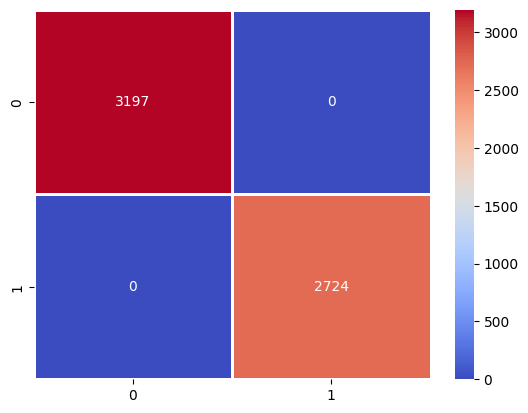

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3197
           1       1.00      1.00      1.00      2724

    accuracy                           1.00      5921
   macro avg       1.00      1.00      1.00      5921
weighted avg       1.00      1.00      1.00      5921

Resposta:
O modelo apresenta maior dificuldade em identificar casos de alto consumo, tendendo a classificar alguns casos de alto consumo como baixo.


In [140]:
from sklearn.metrics import confusion_matrix, classification_report

matriz_de_confusao = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_de_confusao, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

print(classification_report(y_test, y_pred))

print("Resposta:")
print("O modelo apresenta maior dificuldade em identificar casos de alto consumo, tendendo a classificar alguns casos de alto consumo como baixo.")